In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# from sklearn.decomposition import PCA

# task 3

In [22]:
def zeroMean(dataMat):
    meanVal=np.mean(dataMat, axis=0)
    newData=dataMat-meanVal
    return newData,meanVal

def pca(dataMat,n):
    newData,meanVal=zeroMean(dataMat)
    # print(newData)
    covMat=np.cov(newData, rowvar=0)
    print(covMat)
    eigvals,eigVects=np.linalg.eig(np.mat(covMat))
    eigValIndice=np.argsort(eigvals)
    # print(eigValIndice)
    n_eigvalIndice=eigValIndice[ -1:-(n+1):-1] # pick n values from last to start
    print(n_eigvalIndice)
    
    # choose the smallest one
    # n_eigvalIndice=1  # 1 is the index of the smallest eigenvalue
    
    n_eigvect=eigVects[ :,n_eigvalIndice]
    print(n_eigvect)
    lowDDataMat=newData*n_eigvect
    reconMat=( lowDDataMat*n_eigvect.T)+meanVal
    return eigvals,eigVects,lowDDataMat ,reconMat


In [23]:
old_matrix=np.array([[0,1],[-1/2,3/2],[3/2,5/2],[1,3]])

In [26]:
a,b,c,new_matrix=pca(old_matrix,2)


[[0.83333333 0.66666667]
 [0.66666667 0.83333333]]
[0 1]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [15]:
b

matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]])

# a is eigenvalue

In [49]:
_,_,c,new_matrix=pca(old_matrix,2)
c   # using largest

[[0.83333333 0.66666667]
 [0.66666667 0.83333333]]
[0 1]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


matrix([[-1.06066017, -0.35355339],
        [-1.06066017,  0.35355339],
        [ 1.06066017, -0.35355339],
        [ 1.06066017,  0.35355339]])

In [47]:
onedim

matrix([[-1.06066017],
        [-1.06066017],
        [ 1.06066017],
        [ 1.06066017]])

In [45]:
new_matrix

matrix([[ 5.55111512e-17,  1.00000000e+00],
        [-5.00000000e-01,  1.50000000e+00],
        [ 1.50000000e+00,  2.50000000e+00],
        [ 1.00000000e+00,  3.00000000e+00]])

In [33]:
_,_,c,new_matrix=pca(old_matrix,1)
c   #using smallest

matrix([[-0.35355339],
        [ 0.35355339],
        [-0.35355339],
        [ 0.35355339]])

# C Euclidean Distance --their distance remains same wheather it's 1D or 2D

In [10]:
def get_dis_pairs(M):
    lens=M.shape[0]
    result=np.zeros((lens,lens))
    for i in range(lens):
        j=i+1
        while(j<lens):
            result[i][j]=np.linalg.norm(M[i]-M[j])
            j=j+1
    return result


In [50]:
re1=get_dis_pairs(onedim)  # 1-D
re2=get_dis_pairs(new_matrix) #2-D
re3=get_dis_pairs(old_matrix)

print(re3)
print(re1)
print(re2)

print(c)
print(new_matrix)

[[0.         0.70710678 2.12132034 2.23606798]
 [0.         0.         2.23606798 2.12132034]
 [0.         0.         0.         0.70710678]
 [0.         0.         0.         0.        ]]
[[0.         0.         2.12132034 2.12132034]
 [0.         0.         2.12132034 2.12132034]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[[0.         0.70710678 2.12132034 2.23606798]
 [0.         0.         2.23606798 2.12132034]
 [0.         0.         0.         0.70710678]
 [0.         0.         0.         0.        ]]
[[-1.06066017 -0.35355339]
 [-1.06066017  0.35355339]
 [ 1.06066017 -0.35355339]
 [ 1.06066017  0.35355339]]
[[ 5.55111512e-17  1.00000000e+00]
 [-5.00000000e-01  1.50000000e+00]
 [ 1.50000000e+00  2.50000000e+00]
 [ 1.00000000e+00  3.00000000e+00]]


# D  the two datasets coverted into 1-d form, and lies on the same places in the plot. they are similar

In [42]:
matrixD=np.array([[np.sqrt(1/2),np.sqrt(1/2)],[np.sqrt(1/2),2*np.sqrt(1/2)],[4*np.sqrt(1/2),np.sqrt(1/2)],[4*np.sqrt(1/2),2*np.sqrt(1/2)]])
matrixD

array([[0.70710678, 0.70710678],
       [0.70710678, 1.41421356],
       [2.82842712, 0.70710678],
       [2.82842712, 1.41421356]])

In [43]:
a,_,lowM,newM=pca(matrixD,1)

print(a)
print(lowM)
print(newM)

[1.5        0.16666667]
[[-1.06066017]
 [-1.06066017]
 [ 1.06066017]
 [ 1.06066017]]
[[0.70710678 1.06066017]
 [0.70710678 1.06066017]
 [2.82842712 1.06066017]
 [2.82842712 1.06066017]]


In [43]:
x=np.array(lowM)
y=len(lowM)*[0]
print(x,y)

[[-1.06066017]
 [-1.06066017]
 [ 1.06066017]
 [ 1.06066017]] [0, 0, 0, 0]


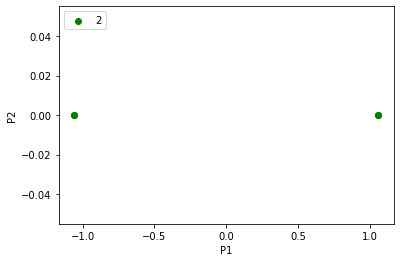

In [52]:
plt.scatter(np.array(lowM),len(lowM)*[0],label="New Dataset",c='g')


plt.xlabel("P1")
plt.ylabel("P2")
plt.legend(loc='upper left')
plt.show()

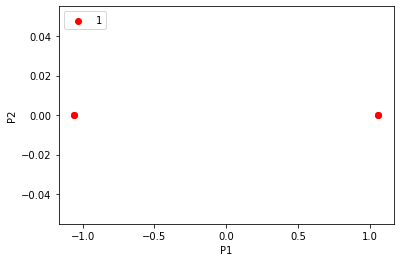

In [53]:
plt.scatter(np.array(c),len(c)*[0],label="Old Dataset",c='r')
plt.xlabel("P1")
plt.ylabel("P2")
plt.legend(loc='upper left')
plt.show()